In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data=pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [16]:
data.drop(['Channel','Region'], axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

In [0]:
clusters=kmeans.cluster_centers_

In [76]:
kmeans.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 4, 4, 1, 0, 0, 0, 1, 4, 1, 0, 1, 0, 1,
       0, 4, 0, 0, 1, 0, 4, 3, 0, 1, 0, 0, 1, 1, 0, 4, 4, 3, 0, 0, 4, 4,
       1, 4, 4, 2, 1, 4, 1, 1, 3, 4, 0, 1, 4, 4, 1, 1, 1, 2, 1, 4, 1, 2,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 4, 1, 1, 1, 4, 1, 0, 1, 2, 2, 3,
       1, 0, 1, 1, 4, 0, 4, 1, 1, 1, 1, 1, 4, 4, 1, 3, 0, 0, 4, 4, 1, 4,
       1, 4, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 3, 3, 0, 0, 1, 3, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 0, 4, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 4, 4, 0, 1, 4, 1, 1, 0, 4, 1, 4, 1, 1, 1, 1, 4, 4, 1, 4, 1, 4,
       3, 1, 1, 1, 1, 3, 4, 3, 1, 1, 1, 1, 4, 4, 0, 1, 1, 4, 1, 0, 0, 1,
       1, 1, 4, 4, 0, 1, 1, 4, 1, 1, 1, 4, 0, 2, 1, 1, 4, 4, 4, 0, 4, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 3, 0, 0,
       0, 1, 1, 4, 1, 1, 0, 1, 1, 4, 1, 0, 1, 0, 1, 1, 3, 3, 1, 1, 0, 1,
       4, 4, 4, 0, 4, 0, 1, 1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 1, 3, 0, 3, 3,
       1, 0, 0, 3, 1, 1, 1, 4, 0, 1, 0, 1, 1, 1, 0,

In [83]:
import collections
print(collections.Counter(y_kmeans))

Counter({1: 224, 0: 104, 4: 81, 3: 24, 2: 7})


In [85]:
clusters_df=pd.DataFrame(kmeans.cluster_centers_,columns=data.columns)
clusters_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,21200.057692,3886.423077,5138.932692,4119.855769,1131.519231,1690.336538
1,6072.049107,3292.946429,4122.933036,2451.991071,1224.500000,996.642857
2,20031.285714,38084.000000,56126.142857,2564.571429,27644.571429,2548.142857
3,48777.375000,6607.375000,6197.791667,9462.791667,932.125000,4435.333333
4,4991.481481,12140.543210,18505.506173,1591.111111,8148.246914,1822.407407


In [86]:
kmeans.inertia_

53018212387.691376

In [0]:
import numpy as np

In [93]:
def dist(y,x):
    return(np.sqrt(sum((y-x)**2)))

sse=0
total=0
for i in range(len(clusters)):
  sse=0
  for j,x in enumerate(data.values):
    if i == y_kmeans[j]:
      sse+=dist(clusters[y_kmeans[j]],x)**2
  print('Cluster:{} SSE:{}'.format(i,sse))
  total+=sse
print('Total:{}'.format(total))

Cluster:0 SSE:8521349737.586536
Cluster:1 SSE:10171730401.223217
Cluster:2 SSE:7469349064.571429
Cluster:3 SSE:16226867469.125006
Cluster:4 SSE:10628915715.185186
Total:53018212387.691376


In [95]:
heterogenity=0
for i in range(len(clusters)):
  for j in range(i+1,len(clusters)):
    heterogenity+=dist(clusters[i],clusters[j])**2

print(heterogenity)

23117248876.89447


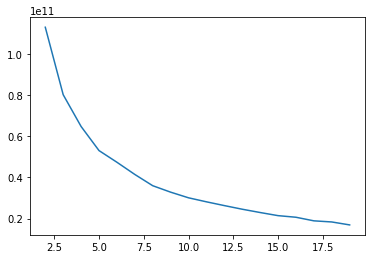

In [98]:
elbow_x=[]
elbow_sse=[]

for i in range(2,20):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300)
  kmeans.fit(data)
  elbow_sse.append(kmeans.inertia_)
  elbow_x.append(i)

plt.plot(elbow_x,elbow_sse)

In [0]:
for i in range(len(data.columns)):
  for j in range(i+1,len(data.columns)):
    plt.scatter(data[columns[i]],data[columns[j]],c=y_kmeans)
    plt.scatter(clusters_df[columns[i]],clusters_df[columns[j]],c='r',s=99)
    plt.xlabel(columns[i])
    plt.ylabel(columns[j])
    plt.show()
   

In [0]:
import sklearn
from sklearn.cluster.hierarchical import AgglomerativeClustering
help(sklearn.cluster.hierarchical)

In [0]:
import scipy.cluster.hierarchy as sch

In [0]:
plt.figure(figsize=(20,10))
Z=sch.linkage(data,'single')
x=sch.dendrogram(Z)

In [8]:
hac_single=AgglomerativeClustering(n_clusters=5,linkage='single')
single=hac_single.fit_predict(data)
print(single)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [26]:
means=[]
m=0
for i in range(5):
  m=0
  for j,x in enumerate(data.values):
    if i==single[j]:
      m+=x
  m=m/data.shape[0]
  means.append(m)
print(means,len(means))

[array([11572.93409091,  5357.01136364,  7580.34090909,  2946.26818182,
        2731.30227273,  1387.73409091]), array([254.88863636,  67.33409091,  41.24545455,  38.05681818,
        11.24545455,  19.43181818]), array([ 83.74318182,  99.88636364,  45.84090909,  83.03181818,
         0.54318182, 108.96136364]), array([ 36.62954545, 104.99318182, 210.86363636,   2.33181818,
        92.78863636,   6.69090909]), array([ 52.10227273, 167.04090909,  72.98636364,   2.24318182,
        45.61363636,   2.05227273])] 5


In [0]:
help(AgglomerativeClustering())

In [27]:
import numpy as np
def dist(y,x):
    return(np.sqrt(sum((y-x)**2)))

sse=0
total=0
for i in range(len(means)):
  sse=0
  for j,x in enumerate(data.values):
    if i == single[j]:
      sse+=dist(means[single[j]],x)**2
  print('Cluster:{} SSE:{}'.format(i,sse))
  total+=sse
print('Total:{}'.format(total))

Cluster:0 SSE:125111500029.0084
Cluster:1 SSE:14098632236.556938
Cluster:2 SSE:7296176492.229003
Cluster:3 SSE:12621048070.25165
Cluster:4 SSE:7329983068.518919
Total:166457339896.5649


In [28]:
heterogenity=0
for i in range(len(means)):
  for j in range(i+1,len(means)):
    heterogenity+=dist(means[i],means[j])**2

print(heterogenity)

930972317.8232852


In [0]:
plt.figure(figsize=(20,10))
Z=sch.linkage(data,'complete')
x=sch.dendrogram(Z)

In [30]:
hac_complete=AgglomerativeClustering(n_clusters=5,linkage='complete')
complete=hac_complete.fit_predict(data)
print(complete)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 4 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
for i in range(len(data.columns)):
  for j in range(i+1,len(data.columns)):
    plt.scatter(data[columns[i]],data[columns[j]],c=y_kmeans)
    plt.scatter(clusters_df[columns[i]],clusters_df[columns[j]],c='r',s=99)
    plt.xlabel(columns[i])
    plt.ylabel(columns[j])
    plt.show()
   

##Previous

In [59]:
columns=data.columns.tolist()
print(columns)

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


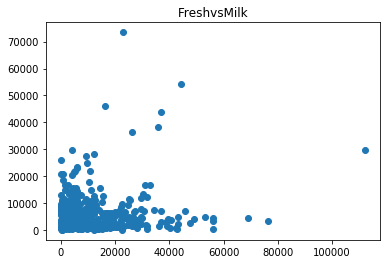

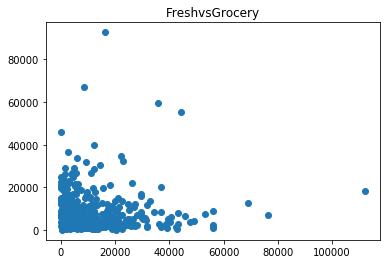

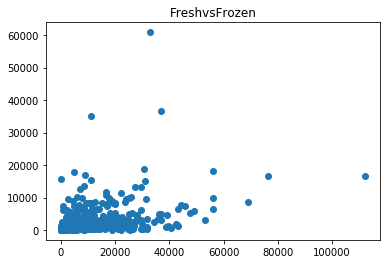

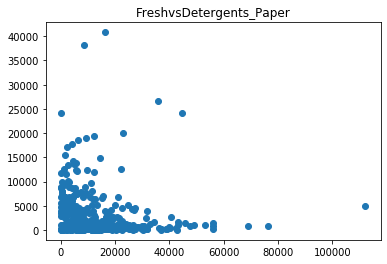

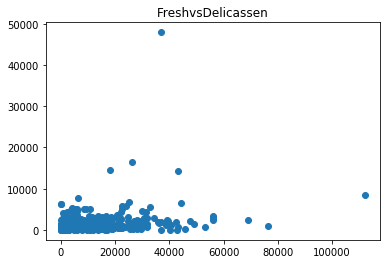

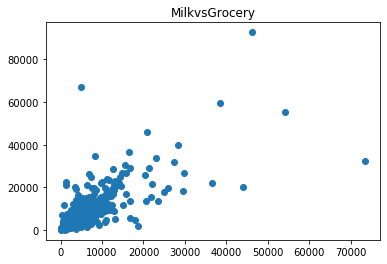

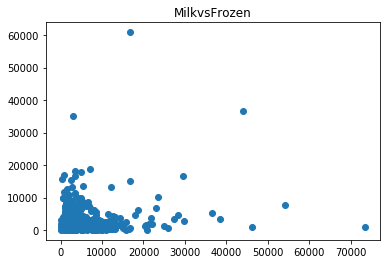

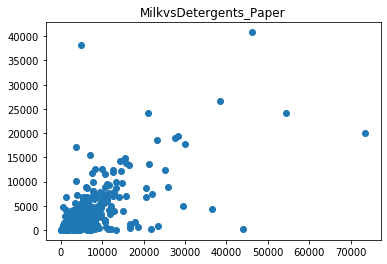

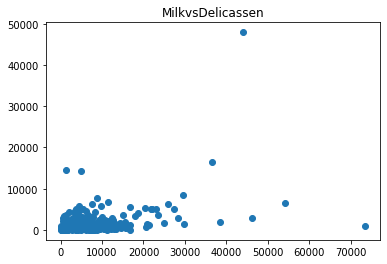

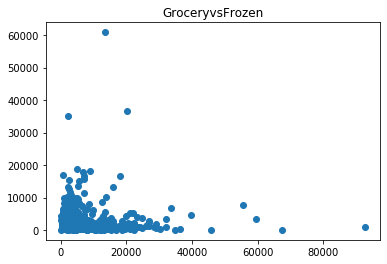

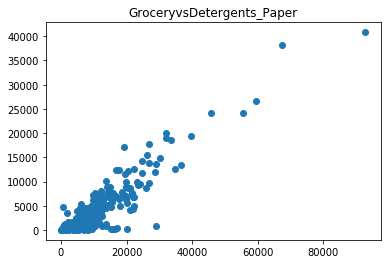

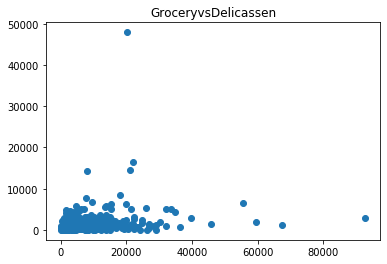

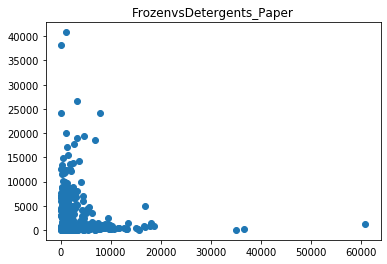

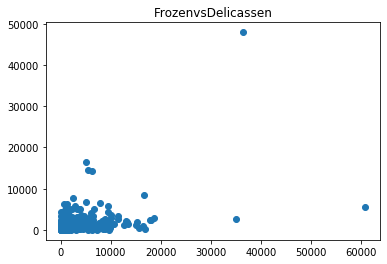

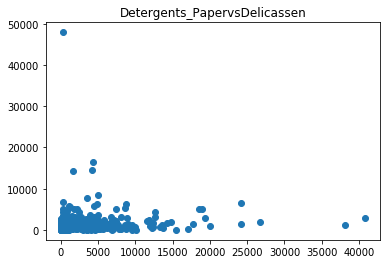

In [60]:
import matplotlib.pyplot as plt
for i in range(len(columns)):
  for j in range(i+1,len(columns)):
    plt.scatter(data[columns[i]],data[columns[j]])
    plt.title(columns[i]+'vs'+columns[j])
    plt.show()

In [0]:
x = data.iloc[:, [0, 1, 2, 3, 4, 5]].values

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans=KMeans(n_clusters=5, random_state=0)

In [0]:
clusters=kmeans.fit(x)

In [65]:
clusters.labels_

array([3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 0, 3, 2, 2, 2, 3, 0, 3, 2, 3, 2, 3,
       2, 0, 2, 2, 3, 3, 0, 1, 2, 3, 2, 2, 3, 3, 2, 0, 0, 1, 2, 2, 0, 0,
       3, 0, 0, 4, 3, 0, 3, 3, 1, 0, 2, 3, 0, 0, 3, 3, 3, 4, 3, 0, 3, 4,
       3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 0, 3, 3, 3, 0, 3, 2, 3, 4, 4, 1,
       3, 2, 3, 3, 0, 2, 0, 3, 3, 3, 3, 3, 0, 0, 3, 1, 3, 2, 0, 0, 3, 0,
       3, 0, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 2, 2, 3, 1, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 3, 2, 0, 3, 3, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 2, 3, 0, 3, 3, 2, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0,
       1, 3, 3, 3, 3, 1, 0, 1, 3, 3, 3, 3, 0, 0, 2, 3, 3, 0, 3, 2, 2, 3,
       3, 3, 0, 0, 2, 3, 3, 0, 3, 3, 3, 0, 2, 4, 3, 3, 0, 0, 0, 2, 0, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 1, 2, 2,
       2, 3, 3, 0, 3, 3, 2, 3, 3, 0, 3, 2, 3, 2, 3, 3, 1, 1, 3, 3, 2, 3,
       0, 0, 0, 2, 0, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 2, 1, 1,
       3, 2, 2, 1, 3, 3, 3, 0, 2, 3, 2, 3, 3, 3, 2,

In [66]:
clusters.cluster_centers_

array([[ 4991.48148148, 12140.54320988, 18505.50617284,  1591.11111111,
         8148.24691358,  1822.40740741],
       [49899.54545455,  6995.        ,  6558.77272727,  9887.18181818,
          984.59090909,  4681.95454545],
       [21627.85576923,  3903.26923077,  5119.35576923,  4194.54807692,
         1123.04807692,  1713.21153846],
       [ 6143.87168142,  3276.7920354 ,  4115.16371681,  2438.34955752,
         1220.70353982,   992.53982301],
       [20031.28571429, 38084.        , 56126.14285714,  2564.57142857,
        27644.57142857,  2548.14285714]])

In [0]:
import collections
print(collections.Counter(clusters))

In [68]:
kmeans=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10,random_state=0)
pred_y = kmeans.fit_predict(x)
pred_y.inertia_

AttributeError: ignored

In [0]:
# y_kmeans=clusters
plt.scatter(x[:,0], x[:, 1], c = pred_y, cmap='rainbow')
# plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'cluster2')
# plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'cluster3')
# plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'cluster4')
# plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'black', label = 'cluster5')
# #Plotting the centroids of the clusters
# # plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'purple', label = 'Centroids')

# # plt.legend()

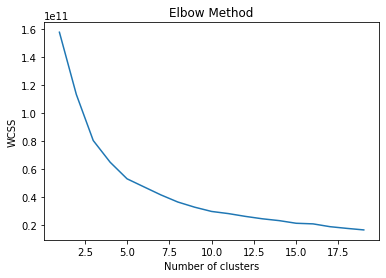

In [0]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
kmeans=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10,random_state=0)
pred_y = kmeans.fit(data)
pred_y.inertia_

64855545528.211044

In [0]:
kmeans=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10,random_state=0)
pred_y = kmeans.fit_predict(data)
for i in range(len(columns)):
  for j in range(i+1,len(columns)):
    plt.scatter(data[columns[i]],data[columns[j]],c=pred_y,label=pred_y)
    plt.title(columns[i]+'vs'+columns[j])
    plt.show()


In [0]:
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [0]:
X = data.iloc[:, [3, 4]].values

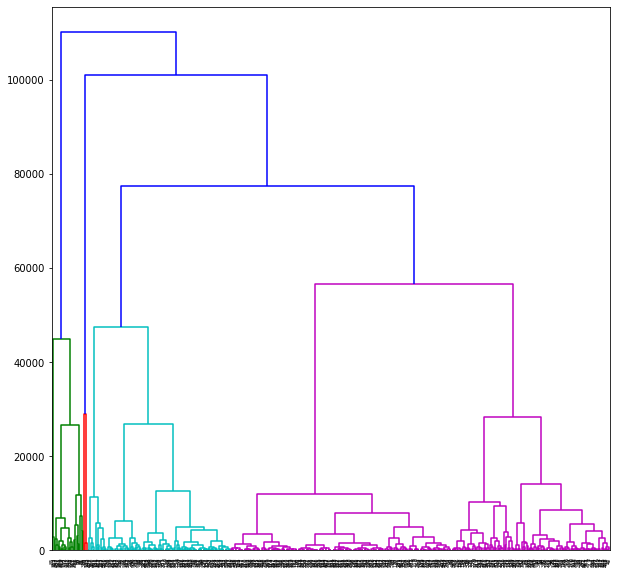

In [0]:
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [0]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

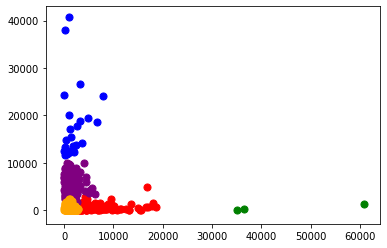

In [0]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()